In [1]:
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import tree
import numpy as np
from sklearn.metrics import mean_squared_error

# Decision tree classifier

In [2]:
# we're just straight up dropping nas which like I know probably not the move but whatever for now
data = pd.read_csv('features.csv')
data.loc[data['bert-gs_scores'] > 0.5, 'bert-gs_label'] = 1
data.loc[data['bert-gs_scores'] <= 0.5, 'bert-gs_label'] = 0
train, test = train_test_split(data.dropna(), test_size=0.2)

In [3]:
len(data.dropna())

2083

In [4]:
data.columns

Index(['Unnamed: 0', 'orig_wav_file', 'mp3', 'speaker', 'word_count', 'start',
       'end', 'duration', 'transcript', 'log_mean_pitch', 'log_stdev_pitch',
       'pitch_rate_of_change_log_variance', 'onset_count', 'onset_rate',
       'onset_time_diff_mean', 'onset_time_diff_var', 'onset_strength_mean',
       'onset_strength_seg_var', 'onset_strength_seg_std',
       'onset_delta_abs_mean', 'onset_delta_var', 'bert-gs_scores',
       'pitch_2_percentile', 'pitch_25_percentile', 'pitch_50_percentile',
       'pitch_75_percentile', 'pitch_98_percentile', 'bert-gs_label'],
      dtype='object')

In [5]:
features = ['word_count', 'duration', 'log_mean_pitch', 'log_stdev_pitch',
       'pitch_rate_of_change_log_variance', 'onset_count', 'onset_rate',
       'onset_time_diff_mean', 'onset_time_diff_var', 'onset_strength_mean',
       'onset_strength_seg_var', 'onset_strength_seg_std',
       'onset_delta_abs_mean', 'onset_delta_var',
       'pitch_2_percentile', 'pitch_25_percentile', 'pitch_50_percentile',
       'pitch_75_percentile', 'pitch_98_percentile']

In [6]:
train_y = train['bert-gs_label']
train_x = train[features]
test_y = test['bert-gs_label']
test_x = test[features]

In [7]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_x, train_y)

[Text(127.4190642813518, 212.49818181818182, 'X[0] <= 77.5\ngini = 0.29\nsamples = 1666\nvalue = [1373, 293]'),
 Text(40.85316571661238, 202.61454545454546, 'X[1] <= 13.61\ngini = 0.185\nsamples = 914\nvalue = [820, 94]'),
 Text(21.265798045602605, 192.73090909090908, 'X[0] <= 50.5\ngini = 0.44\nsamples = 52\nvalue = [35, 17]'),
 Text(14.177198697068404, 182.84727272727272, 'X[11] <= 1.222\ngini = 0.375\nsamples = 44\nvalue = [33, 11]'),
 Text(8.72442996742671, 172.96363636363637, 'X[12] <= 0.115\ngini = 0.488\nsamples = 19\nvalue = [11, 8]'),
 Text(6.543322475570033, 163.07999999999998, 'X[6] <= 6.032\ngini = 0.391\nsamples = 15\nvalue = [11, 4]'),
 Text(4.362214983713355, 153.19636363636363, 'X[3] <= 0.078\ngini = 0.337\nsamples = 14\nvalue = [11, 3]'),
 Text(2.1811074918566775, 143.31272727272727, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(6.543322475570033, 143.31272727272727, 'X[9] <= 0.526\ngini = 0.26\nsamples = 13\nvalue = [11, 2]'),
 Text(4.362214983713355, 133.42909090

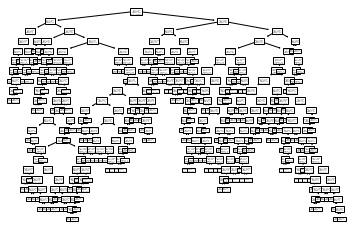

In [8]:
tree.plot_tree(clf)

In [9]:
preds = clf.predict(test_x)
correct = sum(preds == test_y)
correct

302

In [10]:
total = len(test_y)
total

417

In [11]:
correct/total

0.7242206235011991

In [12]:
confusion_matrix(test_y, preds)
#           predicted NO     predicted YES
# actual NO
# actual YES

array([[284,  63],
       [ 52,  18]])

# Decision tree regression

In [13]:
train_y_reg = train['bert-gs_scores']
train_x_reg = train[features]
test_y_reg = test['bert-gs_scores']
test_x_reg = test[features]

In [14]:
clf_reg = tree.DecisionTreeRegressor()
clf_reg = clf_reg.fit(train_x_reg, train_y_reg)

In [15]:
#tree.plot_tree(clf_reg)

In [16]:
preds_reg = clf_reg.predict(test_x_reg)
#correct = sum(preds == test_y_reg)
#preds

In [17]:
mean_squared_error(test_y_reg, preds_reg)

0.6990486873042624